These examples illustrate common operations on polyhedra using [Polyhedra.jl](https://github.com/JuliaPolyhedra/Polyhedra.jl):

- [Intersection](#Intersection).
- [Convex hull](#Convex-hull).

In [1]:
using Polyhedra, CDDLib

### Intersection <a name="Intersection"></a> 

Intersection of polyhedra is obtained with the [`intersect`](https://juliapolyhedra.github.io/Polyhedra.jl/latest/utilities.html#Base.intersect) function.

Below we compute the intersection of two randomly generated polygons in V-representation.

In [2]:
P1 = polyhedron(vrep(randn(15, 2)), CDDLib.Library())

Polyhedron CDDLib.Polyhedron{Float64}:
15-element iterator of Array{Float64,1}:
 [0.653435, -0.187627]
 [0.17263, -0.864529]
 [1.03956, -0.661604]
 [-1.98295, -0.124786]
 [0.471671, 0.729333]
 [-0.610414, -0.793724]
 [0.0466702, -1.16875]
 [0.485415, 0.0210984]
 [-1.27902, 0.477847]
 [1.13851, -0.459599]
 [-0.610409, 0.00688353]
 [-0.551732, 0.473709]
 [-0.383, -0.0635651]
 [0.997255, -1.34599]
 [-1.69915, -1.55624]

In [3]:
P2 = polyhedron(vrep(randn(15, 2)), CDDLib.Library())

Polyhedron CDDLib.Polyhedron{Float64}:
15-element iterator of Array{Float64,1}:
 [0.974105, -0.196659]
 [-1.22919, -1.09104]
 [-0.403396, 0.816207]
 [0.0894763, -1.81554]
 [-0.222775, 0.818613]
 [1.65048, 0.607726]
 [-1.04961, 0.393015]
 [0.049869, 0.000966454]
 [0.910763, -0.153303]
 [-0.690545, 0.949615]
 [0.616334, 1.49328]
 [1.15224, -1.66972]
 [-2.17915, -1.30318]
 [0.301808, -1.59306]
 [0.861699, -0.428743]

In [4]:
Pint = intersect(P1, P2)

Polyhedron CDDLib.Polyhedron{Float64}:
12-element iterator of HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([-1.0, 6.96138], 4.605499227456095)
 HalfSpace([-1.0, 1.16809], 1.837191250573574)
 HalfSpace([-5.04377, -1.0], 10.12634301193736)
 HalfSpace([1.0, -12.8242], 18.25844289054684)
 HalfSpace([6.2751, -1.0], 7.603863621588988)
 HalfSpace([1.78294, 1.0], 1.5702956517801525)
 HalfSpace([1.0, -7.28838], 13.321810319849142)
 HalfSpace([-1.0, 2.40381], 2.9732426844014452)
 HalfSpace([-1.0, -4.42778], 7.949329654479555)
 HalfSpace([-1.51336, 1.0], 1.9946590486397917)
 HalfSpace([1.0, 1.16779], 2.3601791454548358)
 HalfSpace([4.57099, -1.0], 6.936608902132285)

While `P1` and `P2` have been constructed from their V-representation, their H-representation has been computed to build the intersection `Pint`.

In [5]:
hrepiscomputed(P1), vrepiscomputed(P1)

(true, true)

In [6]:
hrepiscomputed(P2), vrepiscomputed(P2)

(true, true)

On the other hand, `Pint` is constructed from its H-representation hence its V-representation has not been computed yet.

In [7]:
hrepiscomputed(Pint), vrepiscomputed(Pint)

(true, false)

We can obtain the number of points in the intersection with `npoints` as follows:

In [8]:
npoints(Pint)

7

Note that this triggers the computation of the V-representation:

In [9]:
hrepiscomputed(Pint), vrepiscomputed(Pint)

(true, true)

We can plot the polygons and their intersection using the `plot` function. For further plotting options see the [Plots.jl](http://docs.juliaplots.org/latest/) documentation.

In [10]:
using Plots

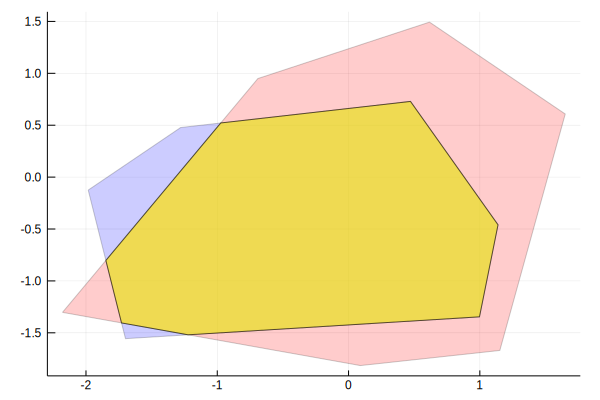

In [11]:
plot(P1, alpha=0.2, color="blue")
plot!(P2, color="red", alpha=0.2)
plot!(Pint, color="yellow", alpha=0.6)

### Convex hull <a name="Convex-hull"></a> 

The binary convex hull operation between two polyhedra is obtained with the [`convexhull`](https://juliapolyhedra.github.io/Polyhedra.jl/latest/utilities.html#Polyhedra.convexhull) function.

Below we compute the convex hull of the two randomly generated polygons in V-representation from the previous example.

In [12]:
Pch = convexhull(P1, P2)

Polyhedron CDDLib.Polyhedron{Float64}:
12-element iterator of Array{Float64,1}:
 [-1.98295, -0.124786]
 [0.471671, 0.729333]
 [-1.27902, 0.477847]
 [1.13851, -0.459599]
 [0.997255, -1.34599]
 [-1.69915, -1.55624]
 [0.0894763, -1.81554]
 [1.65048, 0.607726]
 [-0.690545, 0.949615]
 [0.616334, 1.49328]
 [1.15224, -1.66972]
 [-2.17915, -1.30318]

In [13]:
npoints(Pch)

12

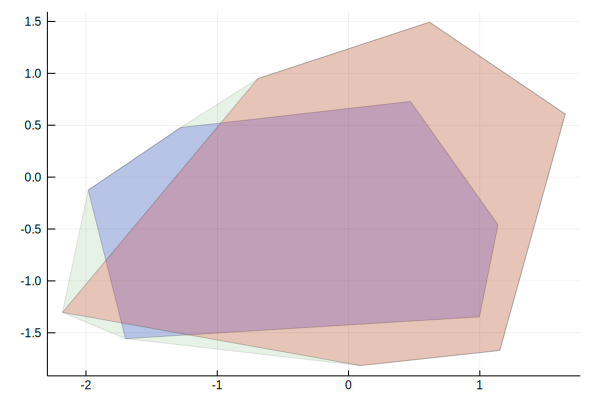

In [14]:
plot(P1, alpha=0.2, color="blue")
plot!(P2, color="red", alpha=0.2)
plot!(Pch, color="green", alpha=0.1)

Note that the convex hull operation is done in the V-representation so no representation conversion is needed for this operation since `P1` and `P2` where constructed from their V-representation:

In [15]:
hrepiscomputed(P1), hrepiscomputed(P2), hrepiscomputed(Pint)

(true, true, true)

Let us note that the `convexhull` of a V-representation contains points and rays and represents the convex hull
of the points together with the conic hull of the rays. So, `convexhull(P1, P2)` does the union of the vertices:

In [2]:
# each of Q1 and Q2 has 15 vertices
Q1 = polyhedron(vrep(randn(15, 2)), CDDLib.Library())
Q2 = polyhedron(vrep(randn(15, 2)), CDDLib.Library())

Polyhedron CDDLib.Polyhedron{Float64}:
15-element iterator of Array{Float64,1}:
 [0.965939, -0.408821]
 [0.0423453, -2.35475]
 [0.445098, 0.496043]
 [-0.503593, -0.643319]
 [0.275412, 0.958958]
 [1.52787, 0.765889]
 [2.32907, 0.508292]
 [0.976168, -0.213605]
 [-1.2088, 0.561409]
 [0.0899901, -1.99332]
 [-0.436715, -0.0207767]
 [-0.915581, -0.307397]
 [0.162809, -0.899802]
 [1.89527, 0.417177]
 [-1.19564, 0.680285]

In [3]:
# check that their convex hull has 30 vertices
Qch = convexhull(Q1, Q2)
npoints(Qch)

30

However, if we want to remove the redundant points we can use `removevredundancy!`:

In [4]:
removevredundancy!(Qch)
npoints(Qch)

9